In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date
import glob
%matplotlib inline

# NYtimes COVID cases by county

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv',
                 parse_dates=['date'])
ny_df = df[(df['county'] == 'New York City') & (df['date'] < '2021-03-21')]
ny_df = ny_df.drop(['county','state','fips'], axis=1)
ny_df = ny_df.set_index('date')

In [3]:
# convert cumulative data to day-over-day
ny_df_diff = ny_df.diff(periods=1)
ny_df_diff.iloc[0] = ny_df.iloc[0]

#negatives deaths in change data due to corrections
#replace with 0s for plotting
ny_df_diff['deaths'] = ny_df_diff['deaths'].clip(lower=0)

In [4]:
ny_df_diff.head()

,cases,deaths
date,,
2020-03-01,1.0,0.0
2020-03-02,0.0,0.0
2020-03-03,1.0,0.0
2020-03-04,0.0,0.0
2020-03-05,2.0,0.0


### Descriptive statistics

In [5]:
#Date Range
print("Start Date:",ny_df_diff.index.min())
print("End Date:",ny_df_diff.index.max())

Start Date: 2020-03-01 00:00:00
End Date: 2021-03-20 00:00:00


In [6]:
ny_df_diff.cases.max()

8021.0

In [7]:
ny_df_diff.describe()

,cases,deaths
count,385.000000,385.000000
mean,2063.015584,79.444156
std,1995.220837,164.872544
min,0.000000,0.000000
25%,355.000000,6.000000
50%,1072.000000,25.000000
75%,3704.000000,71.000000
max,8021.000000,1221.000000


In [8]:
#create 7-day moving average columns
ny_df_diff['cases_SMA_7'] = ny_df_diff.iloc[:,0].rolling(window=7).mean()
ny_df_diff['deaths_SMA_7'] = ny_df_diff.iloc[:,1].rolling(window=7).mean()

### Cases & Seven-day moving average

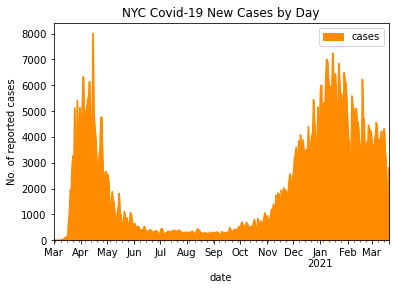

In [9]:
ax = ny_df_diff.plot.area(y='cases', title='NYC Covid-19 New Cases by Day', color='darkorange')
ax.set_ylabel("No. of reported cases")
plt.show()

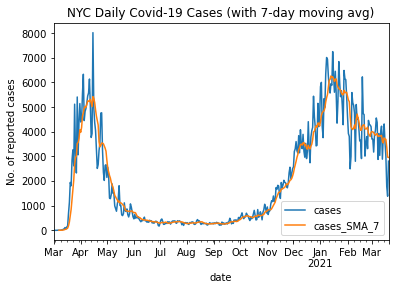

In [10]:
ax = ny_df_diff.plot(y=['cases','cases_SMA_7'],
                     title='NYC Daily Covid-19 Cases (with 7-day moving avg)')
ax.set_ylabel("No. of reported cases")
plt.show()

### Deaths & Seven-day moving average

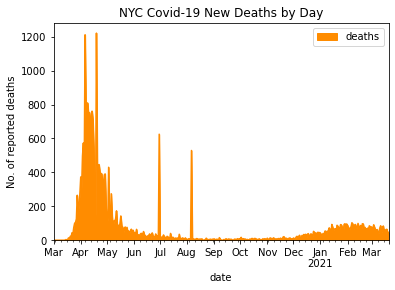

In [11]:
ax = ny_df_diff.plot.area(y='deaths', color='darkorange',title='NYC Covid-19 New Deaths by Day')
ax.set_ylabel("No. of reported deaths")
plt.show()

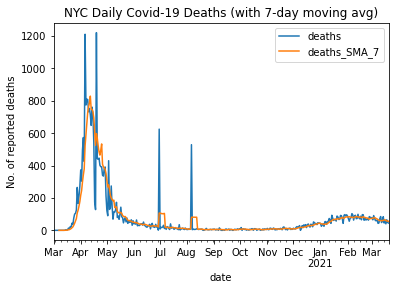

In [12]:
ax = ny_df_diff.plot(y=['deaths','deaths_SMA_7'],
                     title='NYC Daily Covid-19 Deaths (with 7-day moving avg)')
ax.set_ylabel("No. of reported deaths")
plt.show()

### Cases & Deaths Together

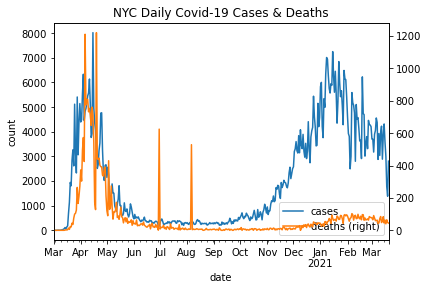

In [13]:
ax = ny_df_diff.plot(y='cases')
ax.set_ylabel("count")
ny_df_diff.plot(y='deaths',secondary_y=True, ax=ax, 
                title='NYC Daily Covid-19 Cases & Deaths')
plt.show()

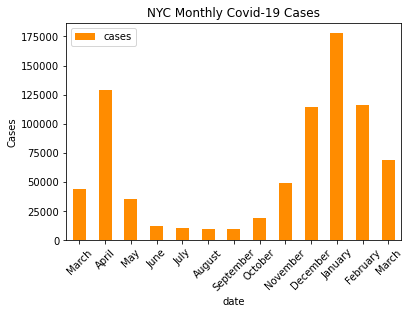

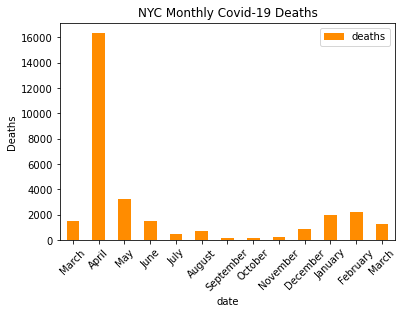

In [15]:
#Group by month

ny_df_diff_monthly = ny_df_diff.resample("M").sum()

ax = ny_df_diff_monthly.plot.bar(y='cases', 
                                 color='darkorange',
                                 title='NYC Monthly Covid-19 Cases', 
                                 rot=45)

ax.set_xticklabels(ny_df_diff_monthly.index.month_name())
ax.set_ylabel("Cases")

ax1 = ny_df_diff_monthly.plot.bar(y = 'deaths', color='darkorange', 
                                  title='NYC Monthly Covid-19 Deaths', 
                                  rot=45)
ax1.set_xticklabels(ny_df_diff_monthly.index.month_name())
ax1.set_ylabel("Deaths")

plt.show()